In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
path = r'../Data'
data_cd_PINN_, data_PINN, data_cd_PINN = np.load(path+r'/cd_PINN_#_loss.npz'), np.load(path+r'/PINN_loss.npz'), np.load(path+r'/cd_PINN_loss.npz')
MSE_cd_PINN_, MSE_PINN, MSE_cd_PINN = data_cd_PINN_['arr5'], data_PINN['arr7'], data_cd_PINN['arr7']

result_cd_PINN_, result_PINN, result_cd_PINN, result_DNO = np.load(path+r'/cd_PINN_#_result.npz'), np.load(path+r'/PINN_result.npz'), np.load(path+r'/cd_PINN_result.npz'), np.load(path+r'/DNO_result.npz')
data_test = np.load(path+r'/testing_data.npz')
U_test, U_test_cd_PINN_, U_test_PINN, U_test_cd_PINN, U_test_DNO = data_test['arr3'], result_cd_PINN_['arr5'], result_PINN['arr5'], result_cd_PINN['arr5'], result_DNO['arr1']

DeepONet_loss_path = os.path.join(path, f'DeepONet_loss.txt')
FNO_loss_path = os.path.join(path, f'FNO_loss.txt')

with open(DeepONet_loss_path, 'r') as file:
    MSE_DeepONet = np.array([line.strip() for line in file.readlines()], dtype=float)
with open(FNO_loss_path, 'r') as file:
    MSE_FNO = np.array([line.strip() for line in file.readlines()], dtype=float)

In [3]:
NRMSE_DON = np.linalg.norm(U_test.reshape(-1, 1) - U_test_DNO.reshape(-1, 1), 2) / np.linalg.norm(U_test.reshape(-1, 1), 2)
NRMSE_PINN = np.linalg.norm(U_test.reshape(-1, 1) - U_test_PINN.reshape(-1, 1), 2) / np.linalg.norm(U_test.reshape(-1, 1), 2)
NRMSE_cd_PINN = np.linalg.norm(U_test.reshape(-1, 1) - U_test_cd_PINN.reshape(-1, 1), 2) / np.linalg.norm(U_test.reshape(-1, 1), 2)
NRMSE_cd_PINN_ = np.linalg.norm(U_test.reshape(-1, 1) - U_test_cd_PINN_.reshape(-1, 1), 2) / np.linalg.norm(U_test.reshape(-1, 1), 2)
print(f'NRMSE cd-PINN: {NRMSE_cd_PINN:2e}, NRMSE PINN: {NRMSE_PINN:2e}, NRMSE cd_PINN_#: {NRMSE_cd_PINN_:2e}, NRMSE DON: {NRMSE_DON:2e}')

NRMSE cd-PINN: 5.243043e-03, NRMSE PINN: 2.071582e-02, NRMSE cd_PINN_#: 8.399626e-02, NRMSE DON: 7.797298e-01


In [4]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['svg.fonttype'] = 'none'

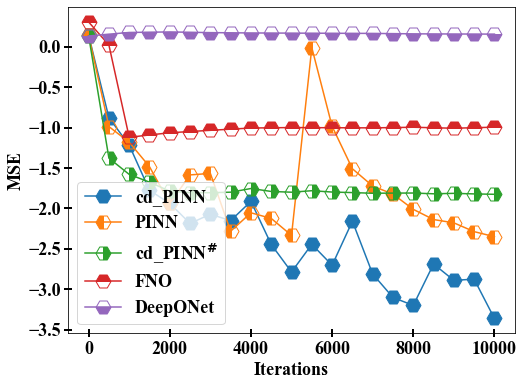

In [5]:
iters = np.arange(0, len(MSE_cd_PINN_)) * 100
iters1 = np.arange(0, len(MSE_DeepONet)) * 1000
DeepONet_mse_20_new = np.interp(iters, iters1, MSE_DeepONet)
FNO_mse_20_new = np.interp(iters, iters1, MSE_FNO)
fig = plt.figure(figsize=(8, 6))
plt.plot(iters[:101:5], np.log10(MSE_cd_PINN[:101:5]), label='cd_PINN', marker='H', markersize=15)
plt.plot(iters[:101:5], np.log10(MSE_PINN[:101:5]), label='PINN', marker='H', markersize=15, fillstyle='left')
plt.plot(iters[:101:5], np.log10(MSE_cd_PINN_[:101:5]), label='cd_PINN$^{\\#}$', marker='H', markersize=15, fillstyle='right')
plt.plot(iters[:101:5], np.log10(FNO_mse_20_new[:101:5]), label='FNO', marker='H', markersize=15, fillstyle='top')
plt.plot(iters[:101:5], np.log10(DeepONet_mse_20_new[:101:5]), label='DeepONet', marker='H', markersize=15,
             fillstyle='bottom')
plt.xlabel('Iterations', fontsize=18, fontweight='bold')
plt.ylabel('MSE', fontsize=18, fontweight='bold')
plt.tick_params(axis='both', labelsize=18, width=2, direction='inout', length=8)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.legend(fontsize=18)
plt.show()

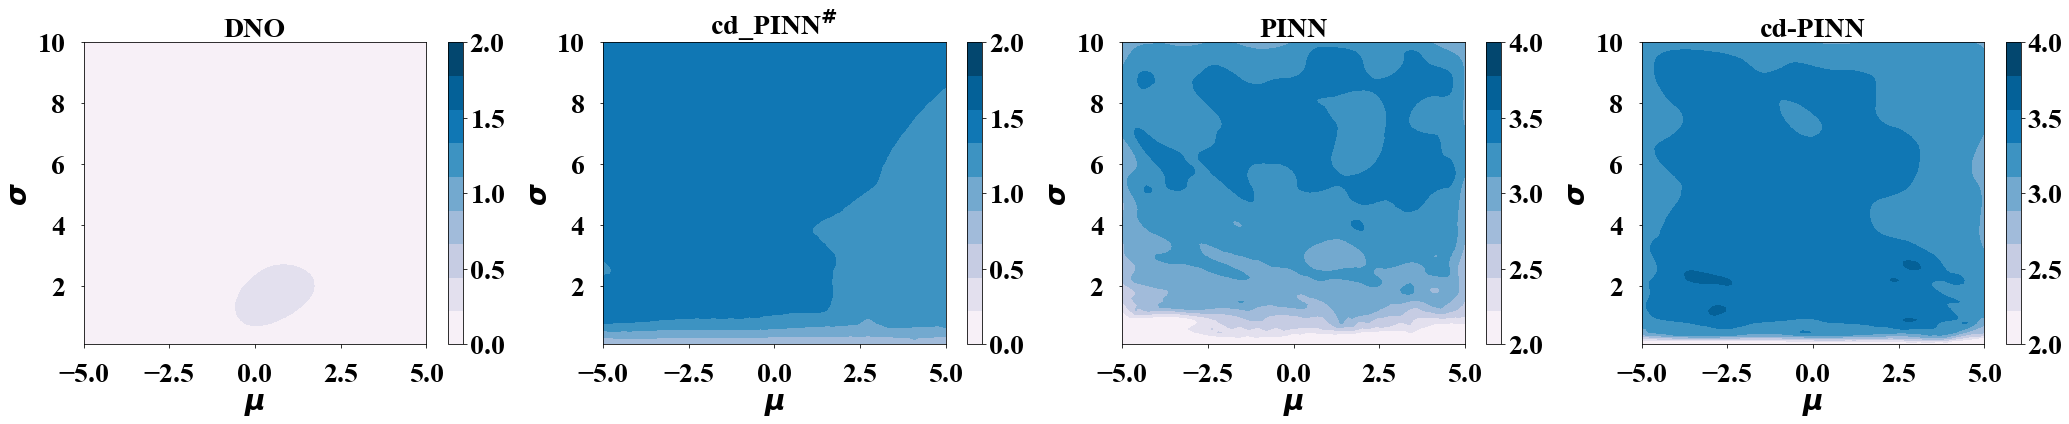

In [6]:
sigmas = np.linspace(0.1, 10.0, 100)
mus = np.linspace(-5.0, 5.0, 101)

fig, axes = plt.subplots(1, 4, figsize=(29, 6))
cmap = 'PuBu'

# DeepONet
nlmae_dno = -np.log10(np.mean(np.abs(U_test_DNO - U_test), axis=(0, 1)))
vmin_dno, vmax_dno = 0.0, 2.0
boundaries_dno = np.linspace(vmin_dno, vmax_dno, 10)
nlmae_dno = np.clip(nlmae_dno, vmin_dno, vmax_dno)

im0 = axes[0].contourf(mus, sigmas, nlmae_dno, cmap=cmap, norm=colors.Normalize(vmin=vmin_dno, vmax=vmax_dno),
                           levels=boundaries_dno)
axes[0].set_title('DNO', fontsize=28, fontweight='bold')
axes[0].set_xlabel('$\mu$', fontsize=28)
axes[0].set_ylabel('$\sigma$', fontsize=28)
axes[0].tick_params('both', labelsize=28, pad=15)
cbar0 = fig.colorbar(im0, ax=axes[0], orientation='vertical')
cbar0.ax.tick_params(labelsize=28)
cbar0.set_ticks(np.arange(vmin_dno, vmax_dno + 0.5, 0.5))

# cd_PINN^#
nlmae_cno = -np.log10(np.mean(np.abs(U_test_cd_PINN_ - U_test), axis=(0, 1)))
vmin_cno, vmax_cno = 0.0, 2.0
boundaries_cno = np.linspace(vmin_cno, vmax_cno, 10)
nlmae_cno = np.clip(nlmae_cno, vmin_cno, vmax_cno)

im1 = axes[1].contourf(mus, sigmas, nlmae_cno, cmap=cmap, norm=colors.Normalize(vmin=vmin_dno, vmax=vmax_dno),
                           levels=boundaries_dno)
axes[1].set_title('cd_PINN$^{\\#}$', fontsize=28, fontweight='bold')
axes[1].set_xlabel('$\mu$', fontsize=28)
axes[1].set_ylabel('$\sigma$', fontsize=28)
axes[1].tick_params('both', labelsize=28, pad=15)
cbar1 = fig.colorbar(im1, ax=axes[1], orientation='vertical')
cbar1.ax.tick_params(labelsize=28)
cbar1.set_ticks(np.arange(vmin_cno, vmax_cno + 0.5, 0.5))

# PINN
nlmae_picno = -np.log10(np.mean(np.abs(U_test_PINN - U_test), axis=(0, 1)))
vmin_picno, vmax_picno = 2.0, 4.0
boundaries_picno = np.linspace(vmin_picno, vmax_picno, 10)
nlmae_picno = np.clip(nlmae_picno, vmin_picno, vmax_picno)

im2 = axes[2].contourf(mus, sigmas, nlmae_picno, cmap=cmap, norm=colors.Normalize(vmin=vmin_picno, vmax=vmax_picno),
                           levels=boundaries_picno)
axes[2].set_title('PINN', fontsize=28, fontweight='bold')
axes[2].set_xlabel('$\mu$', fontsize=28)
axes[2].set_ylabel('$\sigma$', fontsize=28)
axes[2].tick_params('both', labelsize=28, pad=15)
cbar2 = fig.colorbar(im2, ax=axes[2], orientation='vertical')
cbar2.ax.tick_params(labelsize=28)
cbar2.set_ticks(np.arange(vmin_picno, vmax_picno + 0.5, 0.5))  # 每隔 0.5 标一次

# cd-PINN
nlmae_picno_s = -np.log10(np.mean(np.abs(U_test_cd_PINN - U_test), axis=(0, 1)))
vmin_picno_s, vmax_picno_s = 2.0, 4.0
boundaries_picno_s = np.linspace(vmin_picno_s, vmax_picno_s, 10)
nlmae_picno_s = np.clip(nlmae_picno_s, vmin_picno_s, vmax_picno_s)

im3 = axes[3].contourf(mus, sigmas, nlmae_picno_s, cmap=cmap,
                           norm=colors.Normalize(vmin=vmin_picno_s, vmax=vmax_picno_s),
                           levels=boundaries_picno_s)
axes[3].set_title('cd-PINN', fontsize=28, fontweight='bold')
axes[3].set_xlabel('$\mu$', fontsize=28)
axes[3].set_ylabel('$\sigma$', fontsize=28)
axes[3].tick_params('both', labelsize=28, pad=15)
cbar3 = fig.colorbar(im3, ax=axes[3], orientation='vertical')
cbar3.ax.tick_params(labelsize=28)
cbar3.set_ticks(np.arange(vmin_picno_s, vmax_picno_s + 0.5, 0.5))  # 每隔 0.5 标一次

fig.subplots_adjust(left=0.035, right=0.92, top=0.95, bottom=0.1, wspace=0.3, hspace=0.25)
plt.tight_layout()
plt.show()

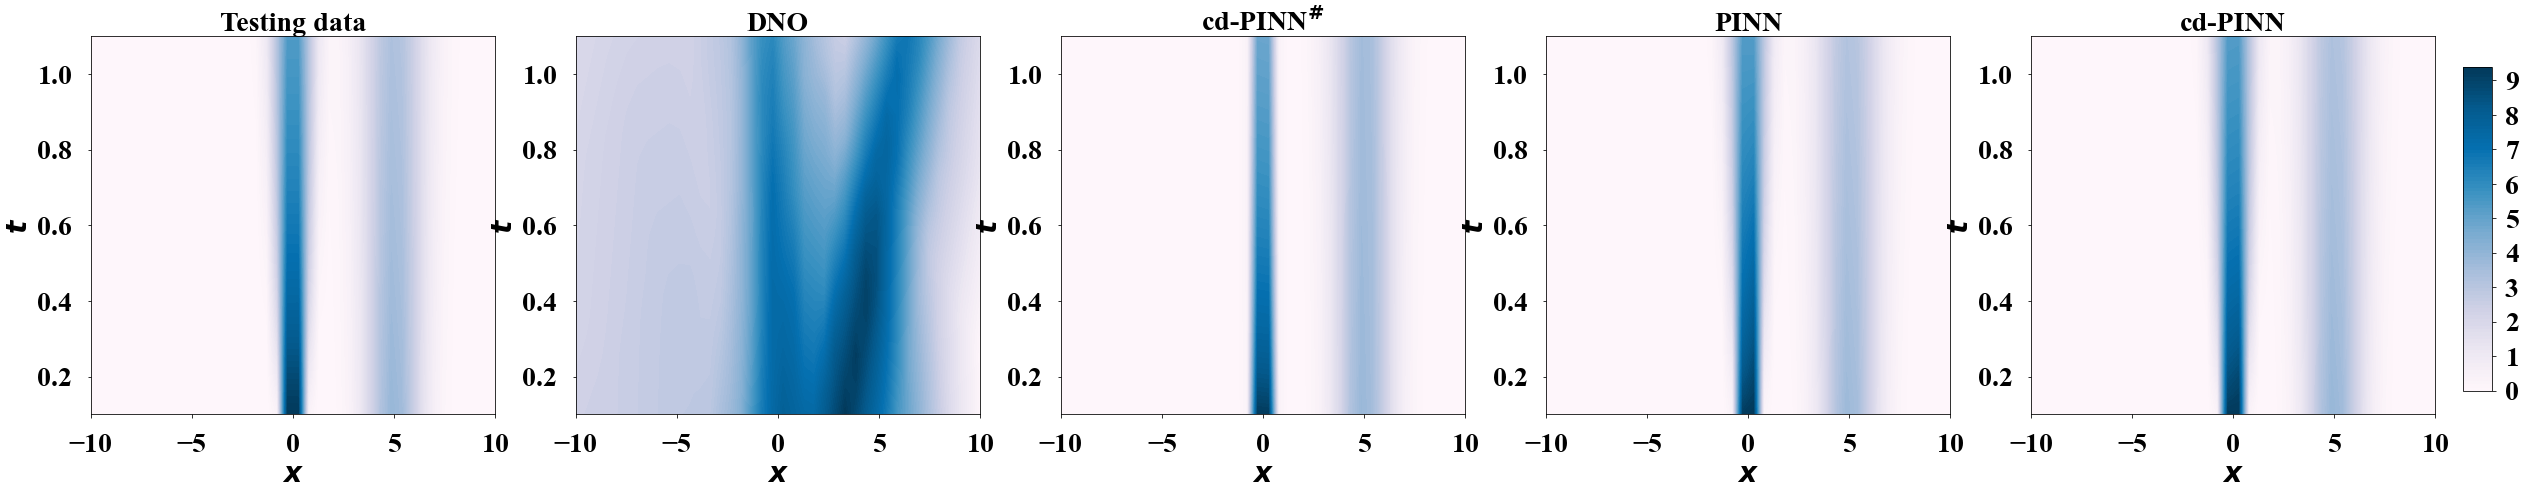

In [7]:
x_test = np.linspace(-10.0, 10.0, 40)
t_test = np.linspace(0.1, 1.1, 20)
a, b = 1, 50

fig, axes = plt.subplots(1, 5, figsize=(39, 6))
cmap = 'PuBu'
data_list = [U_test, U_test_DNO, U_test_cd_PINN_, U_test_PINN, U_test_cd_PINN]
titles = ['Testing data', 'DNO', 'cd-PINN$^{\\#}$', 'PINN', 'cd-PINN']

for i, ax in enumerate(axes):
    im = ax.contourf(x_test, t_test, data_list[i][:, :, a, b], cmap=cmap, levels=100)
    ax.set_title(titles[i], fontsize=28, fontweight='bold')
    ax.set_xlabel('$x$', fontsize=28)
    ax.set_ylabel('$t$', fontsize=28)
    ax.tick_params('both', labelsize=28, pad=15)

cbar_ax = fig.add_axes([0.97, 0.18, 0.01, 0.75])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=28, pad=10)
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.subplots_adjust(right=0.96, top=1.0)
plt.show()